<a href="https://colab.research.google.com/github/kingseungwooya/ais-data-analyze/blob/main/ais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIS data drive에서 갖고오기


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#MMSI의 유일 값 개수 선종별/크기별로 확인하기

In [2]:
import pandas as pd


# CSV 파일 경로
file_paths = [
    '/content/gdrive/MyDrive/ais/Dynamic_20200201.csv'
    #'/content/gdrive/MyDrive/ais/Dynamic_20200203.csv'
    #'/content/gdrive/MyDrive/ais/Dynamic_20200204.csv'
    #,'/content/gdrive/MyDrive/ais/Dynamic_20200205.csv'
]

# 빈 리스트 생성
dfs = []

# 각 CSV 파일을 순회하며 데이터프레임을 리스트에 추가
for file_path in file_paths:
    df = pd.read_csv(file_path
, encoding='cp949',skiprows=2
,dtype={'MMSI':'object','일시':'object','위도':'float64','경도':'float64','SOG':'float64','COG':'float64','Heading':'float64'})
    dfs.append(df)

# 데이터프레임 합치기
df = pd.concat(dfs, ignore_index=True)

df_static = pd.read_csv('/content/gdrive/MyDrive/ais/Static.csv'
, encoding='cp949'
,dtype={'MMSI':'object','선박명':'object','선종코드':'object','IMO':'object','호출부호':'object'
,'DimA':'float64','DimB':'float64','DimC':'float64','DimD':'float64'
,'흘수':'float64','추정톤수':'float64'})

# AIS df 정보 확인
print('df information')
df.info()

# 데이터 분포 확인 
df.describe()

# MMSI 유일 값 개수 확인하기
unique_mmsi = df['MMSI'].nunique()

print('Unique MMSI count:', unique_mmsi)

# 선종별 MMSI 개수 확인하기
mmsi_by_ship_type = df.groupby('MMSI')['MMSI'].nunique()
print('MMSI count by ship type:\n', mmsi_by_ship_type)


# MMSI별 데이터 빈도 확인하기
mmsi_freq = df['MMSI'].value_counts()
print('MMSI data frequency:\n', mmsi_freq)

df information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20883535 entries, 0 to 20883534
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   MMSI     object 
 1   일시       object 
 2   위도       float64
 3   경도       float64
 4   SOG      float64
 5   COG      float64
 6   Heading  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ GB
Unique MMSI count: 7900
MMSI count by ship type:
 MMSI
++1effyU6YcgfZFy7tvWwA==    1
+/RV8u/xW4SAKgeKSSPn+Q==    1
+/hr9ckQeZsM94GLPcMvbg==    1
+0BNM9+tC5cqjnNJ0SpGUA==    1
+0O3yiA9CUvKgPA85fuChQ==    1
                           ..
zvA/vS4QY5iThg+rW/moaw==    1
zvDq0wp2UpWxuXNdPwcHSA==    1
zvkum6NEzhK37q95PXbwQA==    1
zxuYKp3vPku+5WlULkTkfw==    1
zzlqSgxgwZpZppZh4J3PAw==    1
Name: MMSI, Length: 7900, dtype: int64
MMSI data frequency:
 Wo8jBZdiJJFfDy6p3dAUcA==    56248
HpeeLzLybf/zJs/ZdfLDdw==    49948
7gYRbzN15GP92FG++QUpeA==    43062
xvqg5oLidnJLDyBa2k0gfg==    42909
0OdLiMdhWlh/e0BqhIxuwA==    41225
     

정적 정보를 이용한 MMSI의 유일 값 개수와 선종별/ 크기별로 확인하고 그래프로 보여준다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

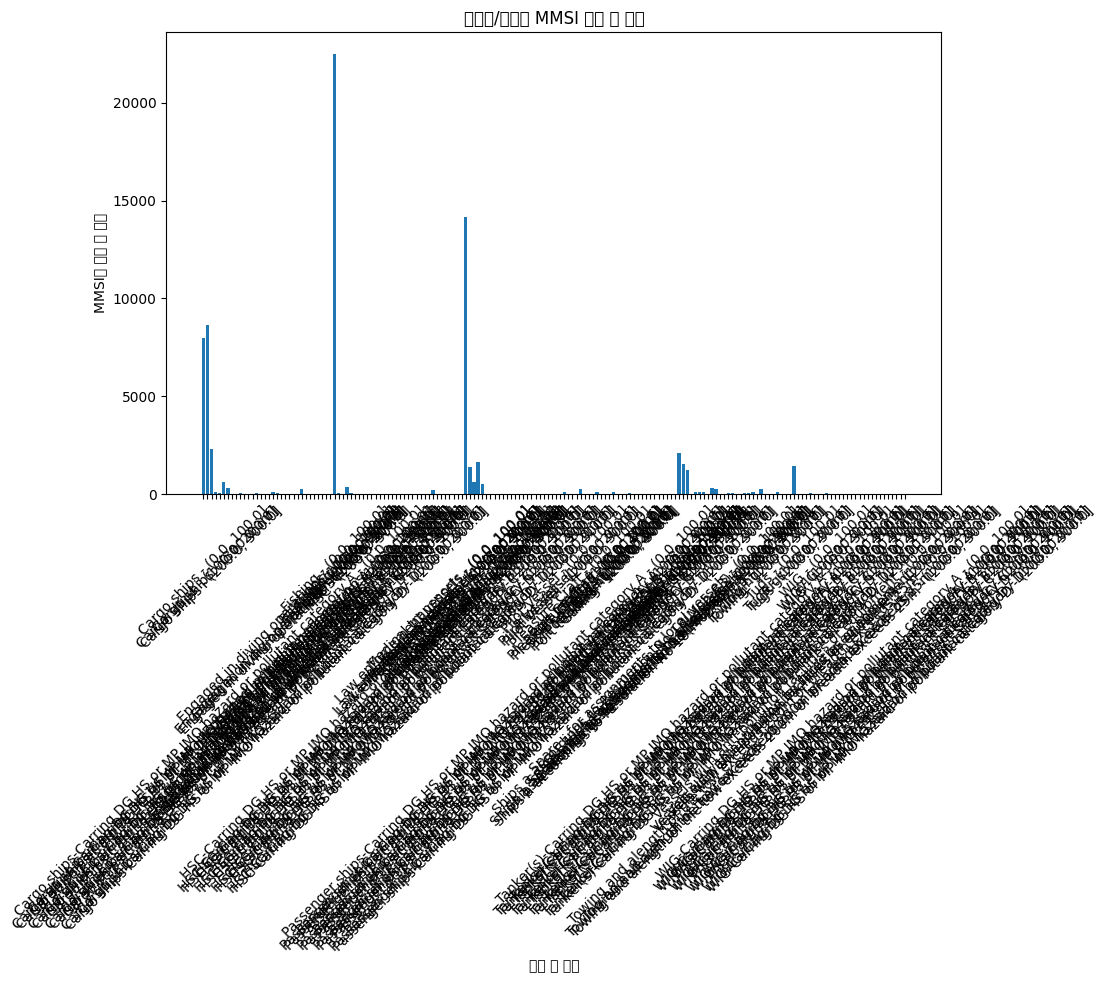

In [3]:
import matplotlib.pyplot as plt

# 선종에 따라 선박의 항적 분리
grouped_by_ship_type = df_static.groupby('선종코드')

# 그래프의 x축과 y축 데이터를 저장할 리스트 초기화
ship_types = []
unique_counts = []

for ship_type, group in grouped_by_ship_type:
    # ship_type: 선종코드
    # group: 해당 선종의 데이터 그룹
    
    # 크기별로 선박의 항적 분리
    grouped_by_size = group.groupby(pd.cut(group['DimA'], bins=[0, 100, 200, 300, float('inf')]))
    
    for size, subgroup in grouped_by_size:
        # size: 크기 범주
        # subgroup: 해당 크기 범주의 데이터 그룹
        
        # MMSI의 유일 값 개수 계산
        unique_count = subgroup['MMSI'].nunique()
        
        # 결과를 그래프의 데이터로 추가
        ship_types.append(f"{ship_type} - {size}")
        unique_counts.append(unique_count)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(ship_types, unique_counts)
plt.xlabel('선종 및 크기')
plt.ylabel('MMSI의 유일 값 개수')
plt.xticks(rotation=45)
plt.title('선종별/크기별 MMSI 유일 값 개수')
plt.show()


##초기 Raw Data 데이터 이상치와 전처리한 데이터 이상치 

In [4]:

# 데이터 분포 확인 
df.describe()

,위도,경도,SOG,COG,Heading
count,2.088354e+07,2.088354e+07,2.088354e+07,2.088354e+07,2.088354e+07
mean,3.630710e+01,1.287964e+02,6.645084e+00,1.716165e+02,3.567848e+02
std,8.497906e+00,8.381185e+00,1.570927e+01,1.136758e+02,1.810804e+02
min,-1.118481e+02,-2.049670e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.429433e+01,1.264189e+02,0.000000e+00,6.720000e+01,2.060000e+02
50%,3.494703e+01,1.276886e+02,1.000000e+00,1.766000e+02,5.110000e+02
75%,3.591689e+01,1.290668e+02,9.500000e+00,2.660000e+02,5.110000e+02
max,9.100000e+01,1.970889e+02,1.023000e+02,4.095000e+02,5.110000e+02


In [5]:
# 결측치(null) 확인
# 위도 32~40, 경도 124~132, SOG 40이하, COG 0~359, Heading 0~359 범위 이외의 값 제외
df_preprocessed = df[
    (df['위도'] >= 32) & (df['위도'] <= 40) &
    (df['경도'] >= 124) & (df['경도'] <= 132) &
    (df['SOG'] <= 40) &
    (df['COG'] >= 0) & (df['COG'] <= 359) &
    (df['Heading'] >= 0) & (df['Heading'] <= 359)
]
print('RAW DATA 결측치 개수')
print(df.isnull().sum())

# 이상치 확인
# df.describe()
df_preprocessed.describe()

RAW DATA 결측치 개수
MMSI       0
일시         0
위도         0
경도         0
SOG        0
COG        0
Heading    0
dtype: int64


,위도,경도,SOG,COG,Heading
count,9.563274e+06,9.563274e+06,9.563274e+06,9.563274e+06,9.563274e+06
mean,3.528372e+01,1.277170e+02,5.554328e+00,1.665203e+02,1.825551e+02
std,1.274206e+00,1.547747e+00,6.269847e+00,1.076941e+02,1.118735e+02
min,3.200000e+01,1.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.459969e+01,1.264201e+02,0.000000e+00,6.550000e+01,7.300000e+01
50%,3.508034e+01,1.277326e+02,1.800000e+00,1.755000e+02,1.930000e+02
75%,3.604706e+01,1.291515e+02,1.090000e+01,2.543000e+02,2.810000e+02
max,3.974550e+01,1.319999e+02,4.000000e+01,3.590000e+02,3.590000e+02


# 데이터 전처리
이상치 제거한 데이터 분포 boxplot으로 확인

<ipython-input-6-ee886d4dec3c>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_interpolated = df_preprocessed.groupby('MMSI').apply(lambda x: x.interpolate(method='linear', limit_direction='both'))


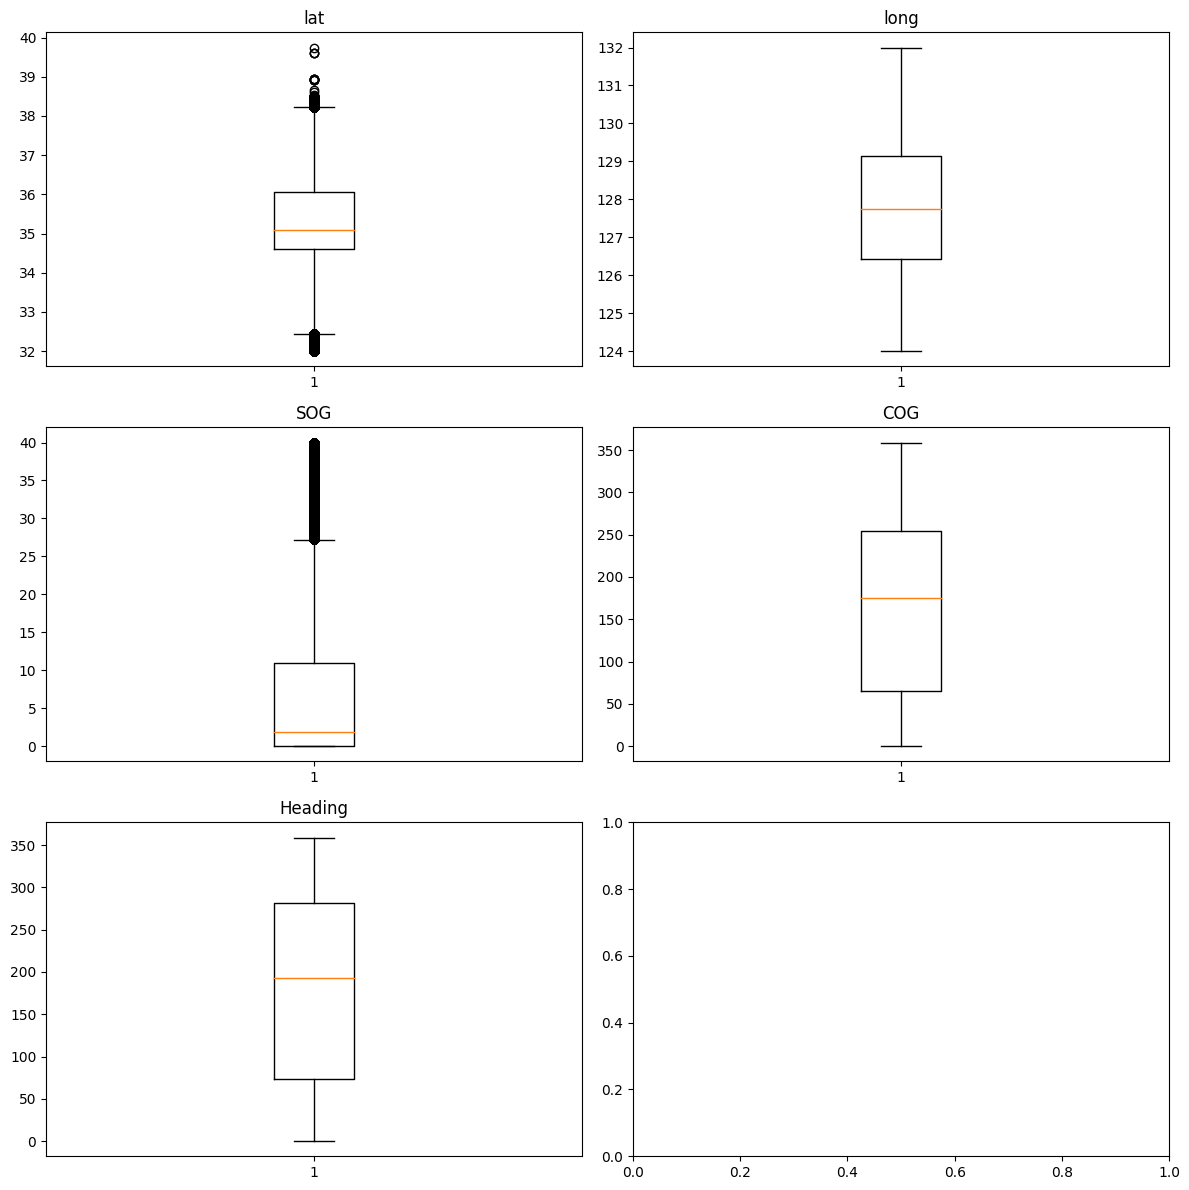

In [6]:
import matplotlib.pyplot as plt

# MMSI별로 보간한 데이터프레임 생성
df_interpolated = df_preprocessed.groupby('MMSI').apply(lambda x: x.interpolate(method='linear', limit_direction='both'))

# 컬럼별 분포 확인

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axes[0][0].boxplot(df_interpolated['위도'])
axes[0][0].set_title('lat')

axes[0][1].boxplot(df_interpolated['경도'])
axes[0][1].set_title('long')

axes[1][0].boxplot(df_interpolated['SOG'])
axes[1][0].set_title('SOG')

axes[1][1].boxplot(df_interpolated['COG'])
axes[1][1].set_title('COG')

axes[2][0].boxplot(df_interpolated['Heading'])
axes[2][0].set_title('Heading')

plt.tight_layout()
plt.show()


 전처리된 데이터프레임을 기반으로 100m * 100m 격자 단위로 데이터들의 분포를 시각화하는 코드입니다.

먼저 데이터프레임에서 위도와 경도 값을 기반으로 각 데이터가 속한 격자 번호를 계산합니다. 이때 div는 100m에 해당하는 경도 혹은 위도 값의 차이를 나타냅니다. 그리고 각 데이터에 대해 cnt=1로 설정하여 데이터 개수를 계산할 수 있도록 합니다.

그 후, pivot_table 함수를 이용하여 각 격자별로 데이터 개수의 합을 계산합니다. 이를 통해 100m * 100m 격자 단위로 데이터들의 분포를 확인할 수 있습니다.

마지막으로 pcolor 함수를 이용하여 각 격자별 데이터 개수를 색상으로 표현하여 시각화합니다. 이때 LogNorm 함수를 이용하여 색상의 밝기를 조정합니다. 1에서 가장 큰 값까지의 로그 스케일로 색상을 표현하도록 vmin과 vmax를 설정합니다. 색상 맵은 'YlGnBu'를 사용합니다.

<ipython-input-7-329256846781>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['cnt'] = 1
<ipython-input-7-329256846781>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['위도_group'] = (df_sub['위도'] - lat_range[0]) // div
<ipython-input-7-329256846781>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

1.0
17823.0
df_sub size
5107720


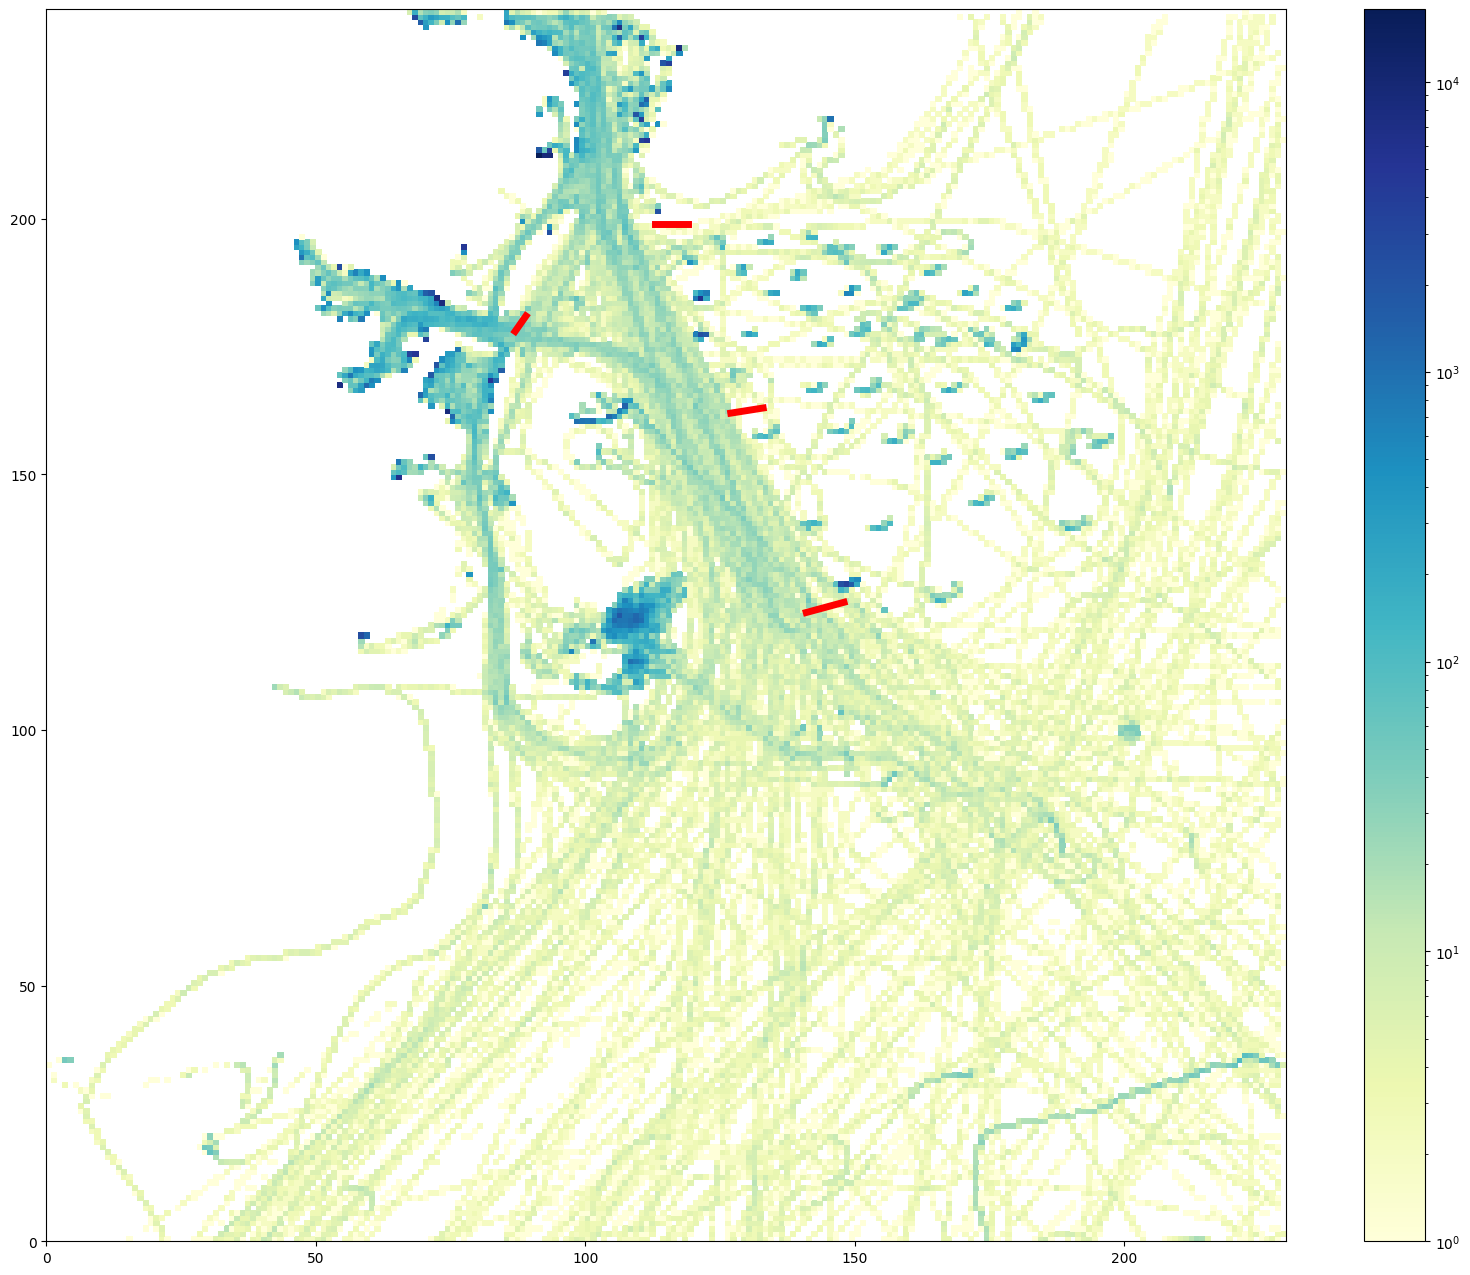

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
sec_6=0.000833
sec_5=0.00833
sec_4=0.026499
sec_3=0.052998
sec_2=0.26499
sec_1=1.05996

# 위도와 경도 범위 설정
lat_range = [35.3, 35.5]
lon_range = [129.3, 129.5]
center = (35.3, 129.3)

# 위도와 경도 범위에 해당하는 데이터 추출
mask = (df_preprocessed['위도'] >= lat_range[0]) & (df_preprocessed['위도'] <= lat_range[1]) & \
       (df_preprocessed['경도'] >= lon_range[0]) & (df_preprocessed['경도'] <= lon_range[1])
df_sub = df_preprocessed.loc[mask]

# 히트맵 데이터 생성
div = sec_6
df_sub['cnt'] = 1
df_sub['위도_group'] = (df_sub['위도'] - lat_range[0]) // div
df_sub['경도_group'] = (df_sub['경도'] - lon_range[0]) // div

ek_pvt2_new = pd.pivot_table(df_sub, index='위도_group', columns='경도_group', values='cnt', aggfunc='sum')

data = ek_pvt2_new

print(data.min().min())
print(data.max().max())

plt.figure(figsize=(20, 16))
plt.pcolor(data, norm=colors.LogNorm(vmin=data.min().min(), vmax=data.max().max()), cmap='YlGnBu')

# pcolor plot 위에 선을 그리기 위해, 위도와 경도를 그대로 사용
x = (df_sub['위도'] - lat_range[0]) // div
y = (df_sub['경도'] - lon_range[0]) // div
# 선을 그릴 시작점과 끝점 좌표 리스트
line1 = [(129.418102, 35.403145), (129.423654, 35.404323)]
line2 = [(129.405878, 35.435258), (129.411327, 35.436435)]
line3 = [(129.372771, 35.448460), (129.374211, 35.450982)]
line4 = [(129.394157, 35.466534), (129.399709, 35.466534)]

# 좌표를 확대할 부분의 중심 좌표에서 빼고 div로 나눈 값으로 변경
line1 = [((coord[0]-center[1])//div, (coord[1]-center[0])//div) for coord in line1]
line2 = [((coord[0]-center[1])//div, (coord[1]-center[0])//div) for coord in line2]
line3 = [((coord[0]-center[1])//div, (coord[1]-center[0])//div) for coord in line3]
line4 = [((coord[0]-center[1])//div, (coord[1]-center[0])//div) for coord in line4]
print("df_sub size")
print(df_sub.size)

# 라인 그리기
for line in [line1, line2, line3, line4]:
    x, y = zip(*line)
    plt.plot(x, y, 'r', linewidth=5)

plt.colorbar()
plt.show()

이제 저 라인들이랑 df_proprocessed에 있는 점들이 지나는 값을 확인한다. 

In [8]:
import numpy as np
line_data = [line1, line2, line3, line4]

for i, line in enumerate(line_data):
    x, y = zip(*line)
    df_on_line = df_preprocessed[(df_preprocessed['위도'].between(min(x), max(x))) 
      & (df_preprocessed['경도'].between(min(y), max(y)))]
    print(f"라인 {i+1}에 속하는 데이터 개수: {len(df_on_line)}")



라인 1에 속하는 데이터 개수: 0
라인 2에 속하는 데이터 개수: 0
라인 3에 속하는 데이터 개수: 0
라인 4에 속하는 데이터 개수: 0
